In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 击球分布

In [3]:
data = pd.read_csv('Wimbledon_featured_matches.csv')
data

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:39:58,5,10,330,2,2,5,...,0,0,0,38.620,50.971,11,123.0,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:40:43,5,10,331,2,2,5,...,0,0,0,17.533,27.766,5,114.0,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:20,5,10,332,2,2,5,...,0,0,0,10.882,18.328,4,124.0,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:52,5,10,333,2,2,5,...,0,0,0,7.893,10.537,1,130.0,C,NCTL,D


In [4]:
data1 = data[['match_id', 'player1', 'player2', 'set_no', 'game_no', 'point_no', \
             'server','serve_no', 'speed_mph', 'serve_width','serve_depth', 'return_depth']]
data1

,match_id,player1,player2,set_no,game_no,point_no,server,serve_no,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,1,1,1,1,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,1,1,2,1,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,1,1,3,1,1,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,1,1,4,1,1,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,1,1,5,1,1,112.0,W,NCTL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,5,10,330,1,1,123.0,C,NCTL,D
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,5,10,331,1,1,114.0,W,NCTL,ND
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,5,10,332,1,1,124.0,W,NCTL,D
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,5,10,333,1,1,130.0,C,NCTL,D


In [5]:
all_players = np.union1d(data['player1'].unique(), data['player2'].unique())
all_players

array(['Alejandro Davidovich Fokina', 'Alexander Bublik',
       'Alexander Zverev', 'Andrey Rublev', 'Carlos Alcaraz',
       'Christopher Eubanks', "Christopher O'Connell",
       'Daniel Elahi Galan', 'Daniil Medvedev', 'David Goffin',
       'Denis Shapovalov', 'Frances Tiafoe', 'Grigor Dimitrov',
       'Guido Pella', 'Holger Rune', 'Hubert Hurkacz', 'Jannik Sinner',
       'Jiri Lehecka', 'Laslo Djere', 'Liam Broady', 'Lorenzo Musetti',
       'Marton Fucsovics', 'Matteo Berrettini', 'Maximilian Marterer',
       'Mikael Ymer', 'Nicolas Jarry', 'Novak Djokovic', 'Quentin Halys',
       'Roman Safiullin', 'Stan Wawrinka', 'Stefanos Tsitsipas',
       'Tommy Paul'], dtype=object)

In [6]:
def calculate_frequency_distribution(player, set_no, game_no):
    filtered_df = data[(data['set_no'] == set_no) & (data['game_no'] == game_no)]
    
    tuples = list(filtered_df.apply(lambda row: (row['serve_width'], row['serve_depth']) 
                                     if (row['server'] == 1 and row['player1'] == player) or 
                                        (row['server'] == 2 and row['player2'] == player)
                                     else (row['return_depth'],), axis=1))
    frequency_distribution = pd.Series(tuples).value_counts().to_dict()
    
    return frequency_distribution

In [7]:
weights = {
    'NCTL': 1, 'ND': 1, 'B': 1,
    'BC': 2, 'BW': 2, 'D': 2, 'CTL': 2,
    'C': 3, 'W': 3
}

def calculate_weighted_average(frequency_distribution):
    total_weighted_value = 0
    total_count = 0
    
    for items, count in frequency_distribution.items():
        item_weight = sum(weights.get(item, 0) for item in items)
        total_weighted_value += item_weight * count
        total_count += count
    
    return total_weighted_value / total_count if total_count else 0

In [8]:
frequency_distributions = {}

for index, row in data.iterrows():
    key1 = (row['player1'], row['set_no'], row['game_no'])
    key2 = (row['player2'], row['set_no'], row['game_no'])
    if key1 not in frequency_distributions:
        frequency_distributions[key1] = calculate_frequency_distribution(row['player1'], row['set_no'], row['game_no'])
    if key2 not in frequency_distributions:
        frequency_distributions[key2] = calculate_frequency_distribution(row['player2'], row['set_no'], row['game_no'])

In [9]:
data['player1_quality'] = data.apply(lambda row: calculate_weighted_average(frequency_distributions[(row['player1'], row['set_no'], row['game_no'])]), axis=1)
data['player2_quality'] = data.apply(lambda row: calculate_weighted_average(frequency_distributions[(row['player2'], row['set_no'], row['game_no'])]), axis=1)
data

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,player1_quality,player2_quality
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,6.000,7.840,2,95.0,BC,NCTL,ND,1.433498,1.226601
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,5.253,7.094,1,118.0,B,CTL,ND,1.433498,1.226601
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,13.800,19.808,4,120.0,B,NCTL,D,1.433498,1.226601
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,51.108,75.631,13,130.0,BW,CTL,D,1.433498,1.226601
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0.649,0.813,1,112.0,W,NCTL,NaN,1.433498,1.226601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:39:58,5,10,330,2,2,5,...,0,38.620,50.971,11,123.0,C,NCTL,D,1.517241,1.034483
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:40:43,5,10,331,2,2,5,...,0,17.533,27.766,5,114.0,W,NCTL,ND,1.517241,1.034483
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:20,5,10,332,2,2,5,...,0,10.882,18.328,4,124.0,W,NCTL,D,1.517241,1.034483
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:52,5,10,333,2,2,5,...,0,7.893,10.537,1,130.0,C,NCTL,D,1.517241,1.034483


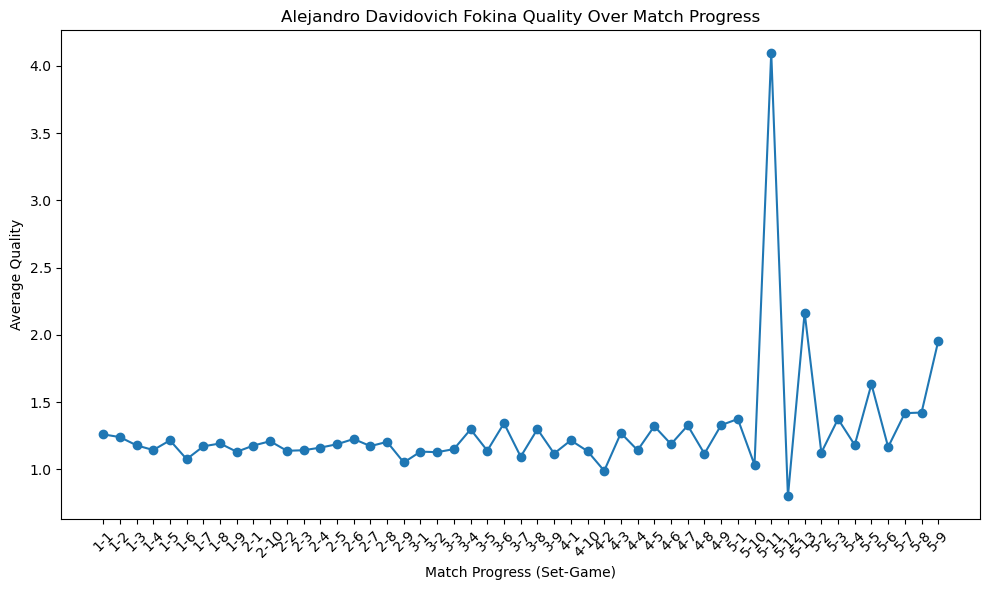

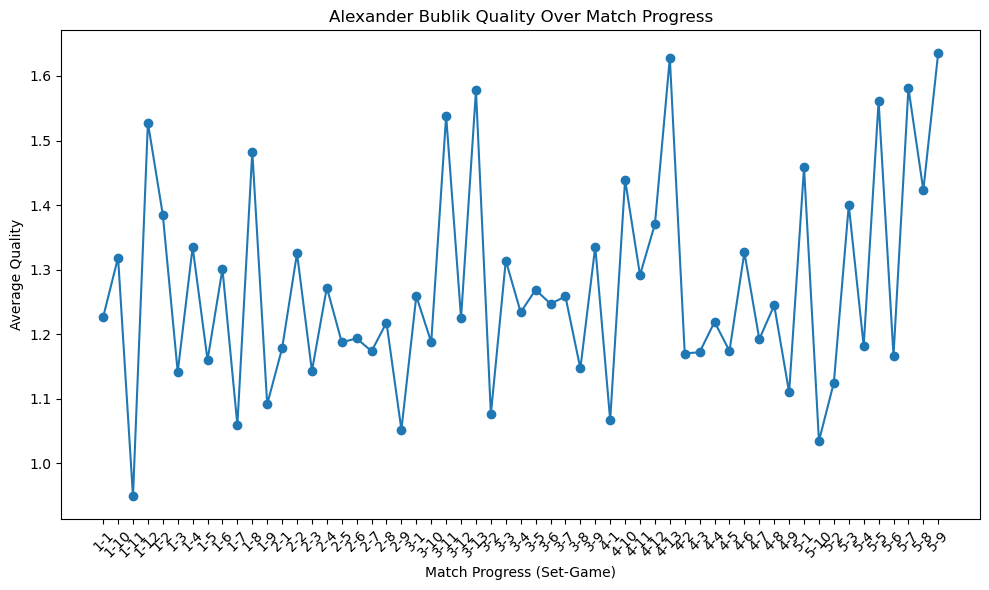

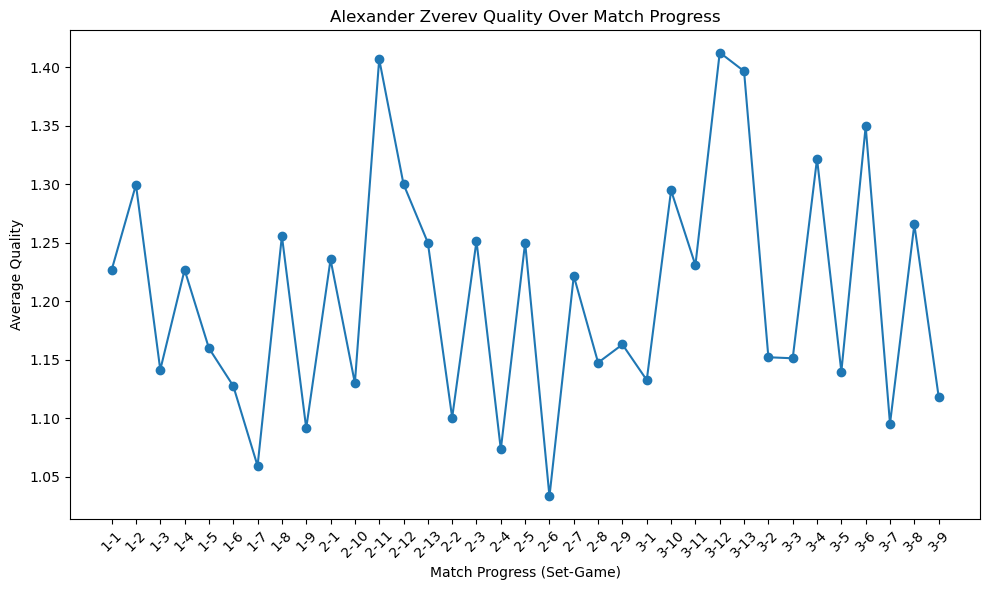

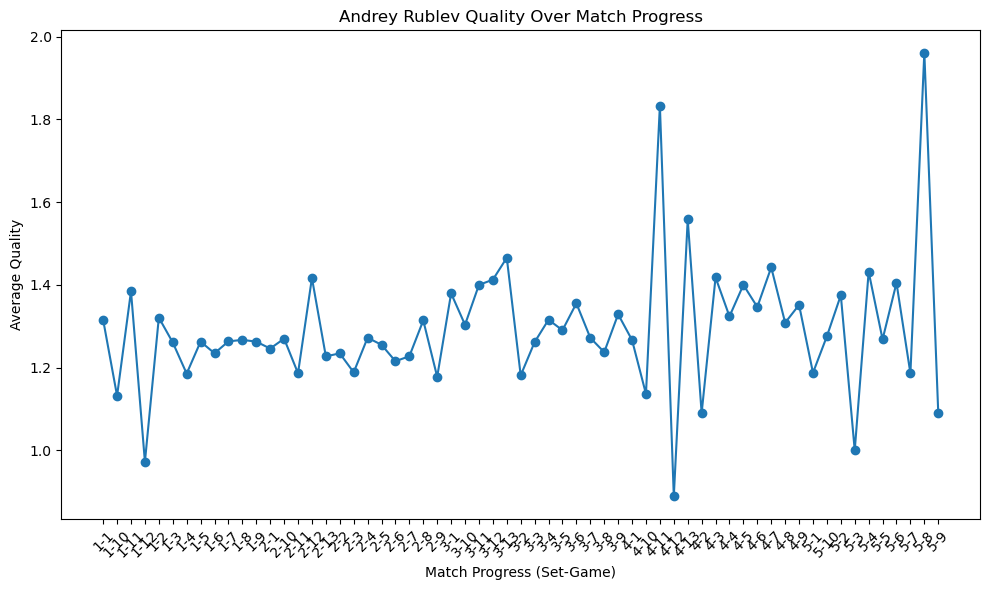

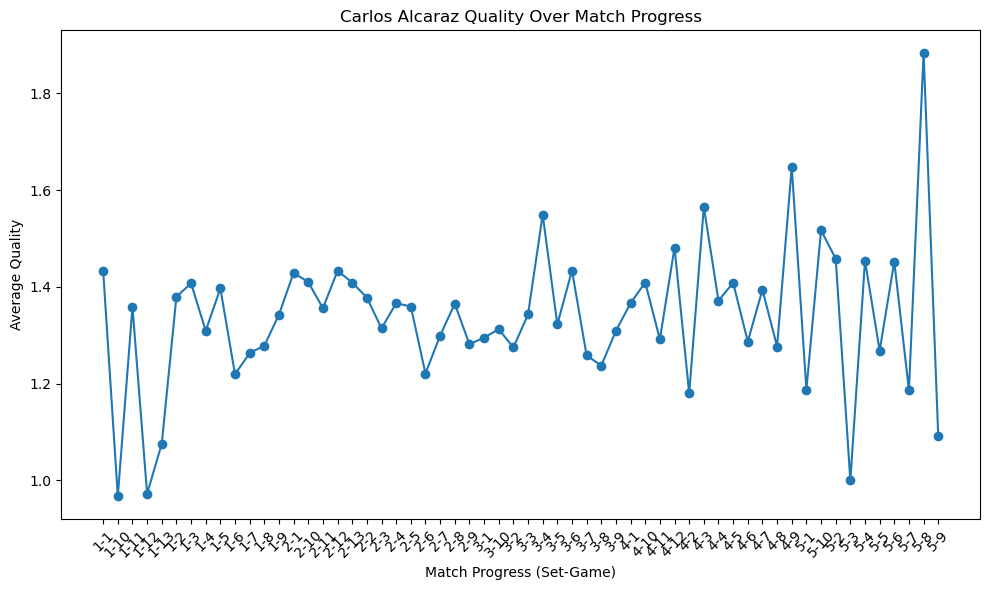

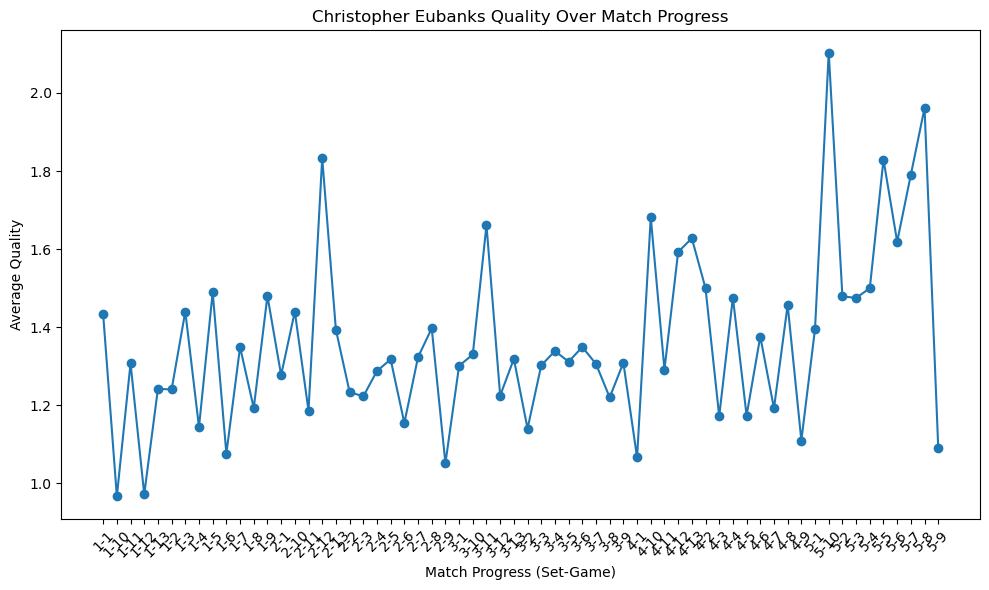

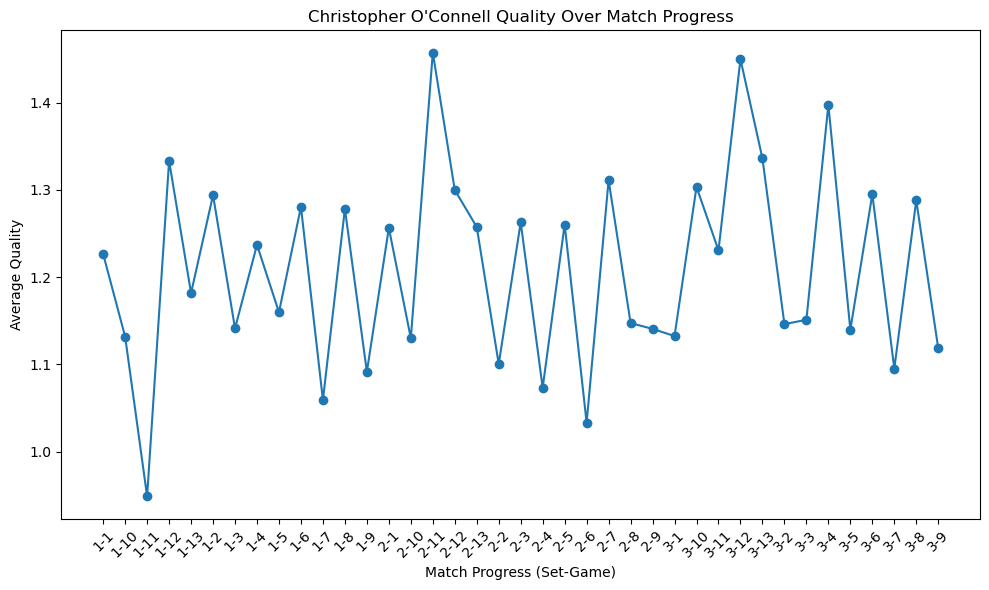

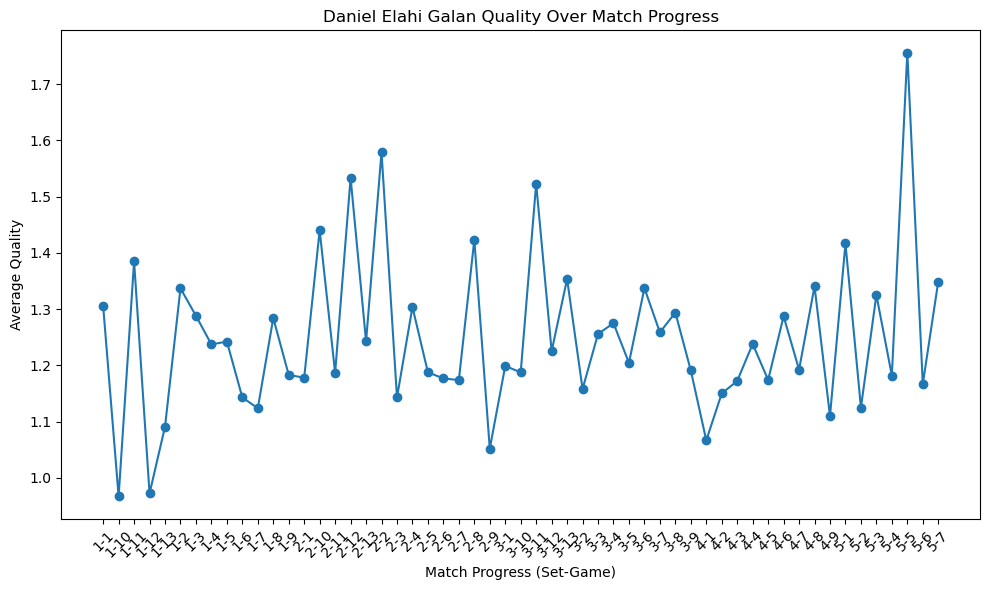

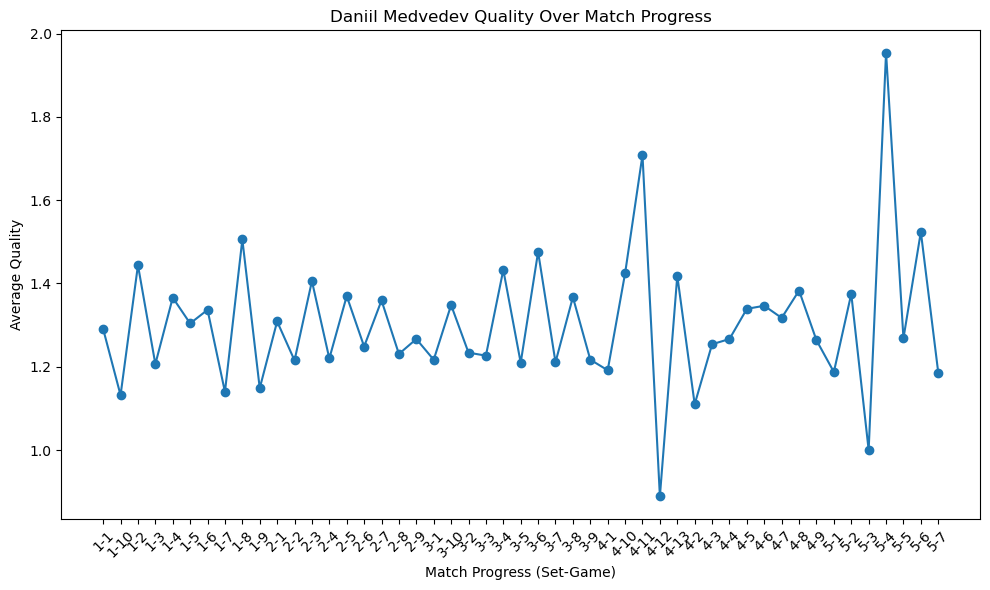

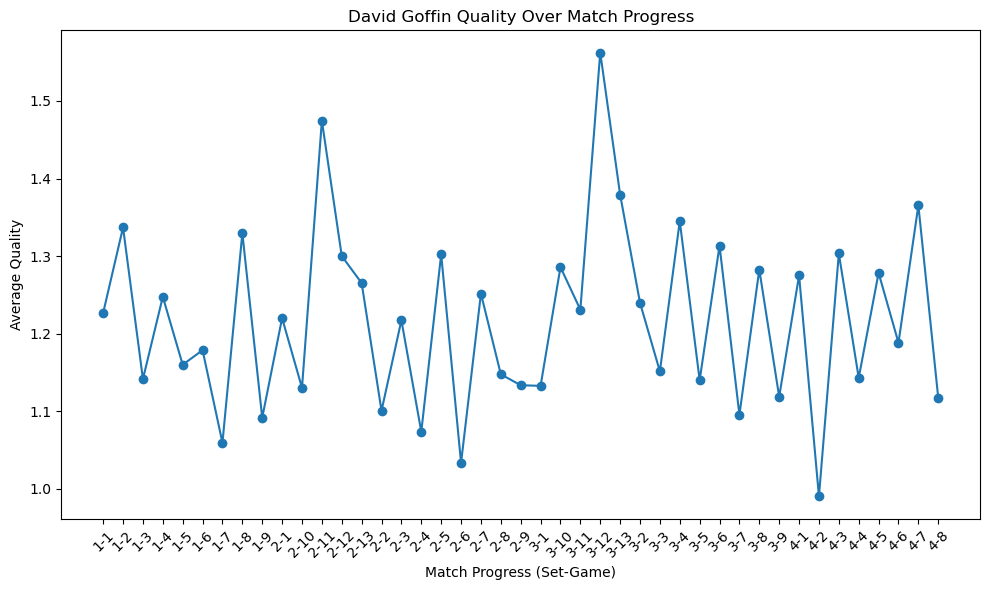

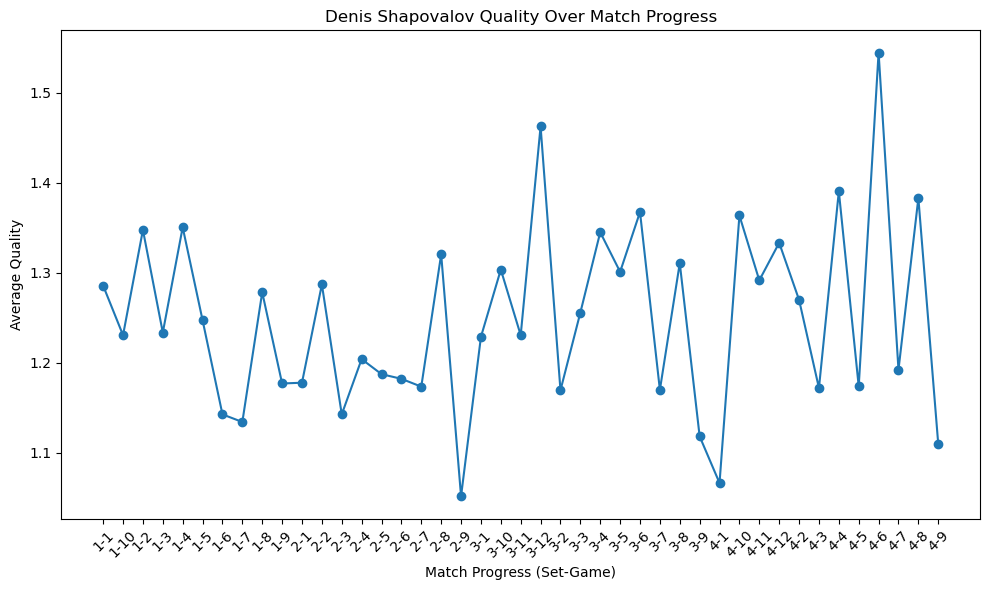

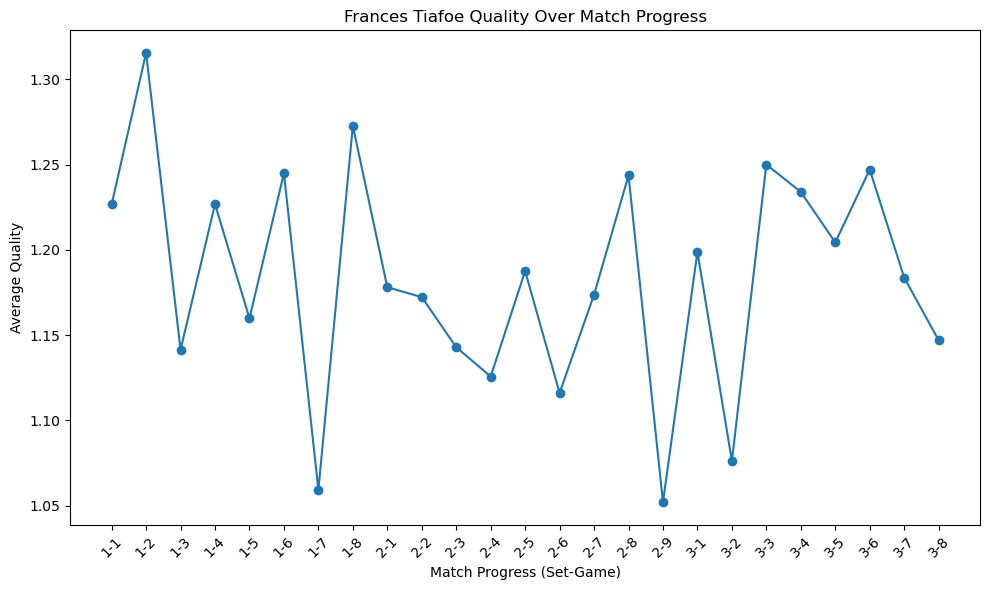

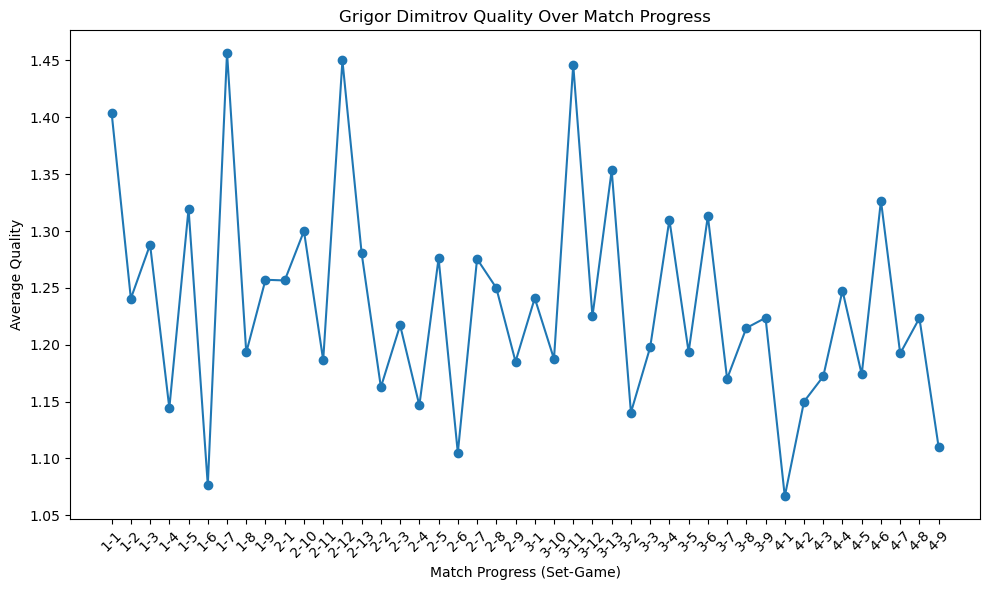

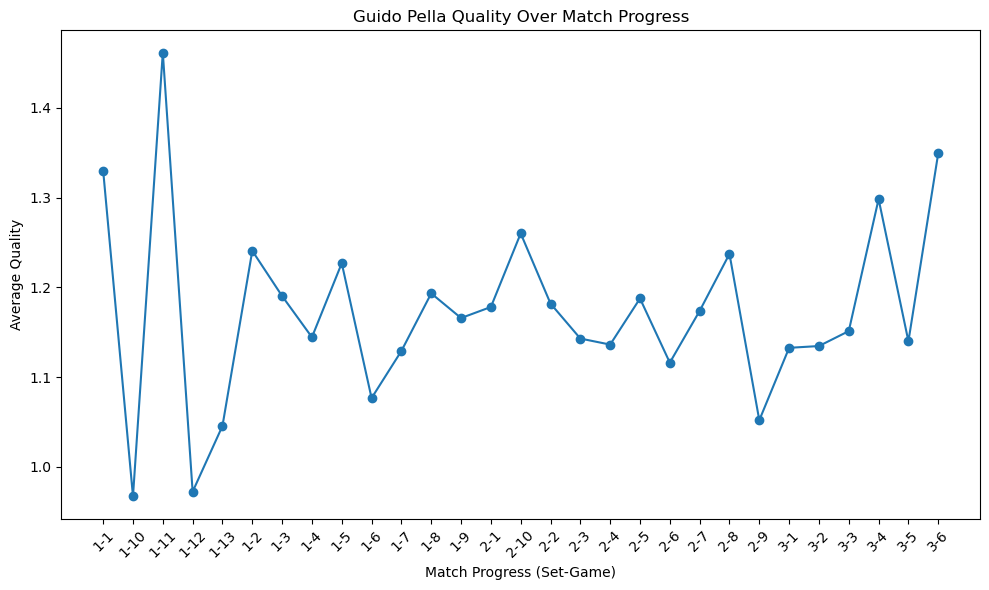

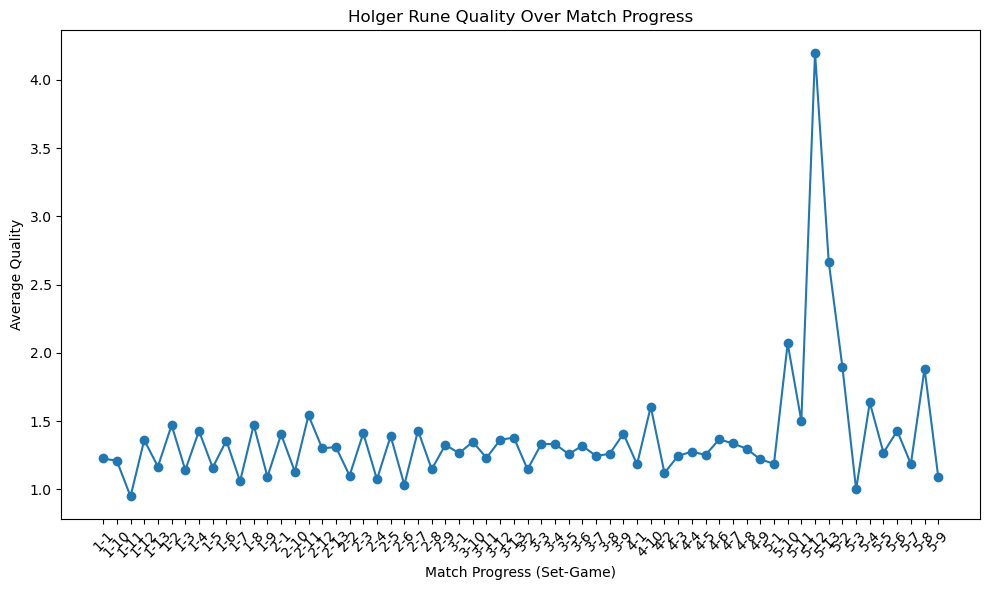

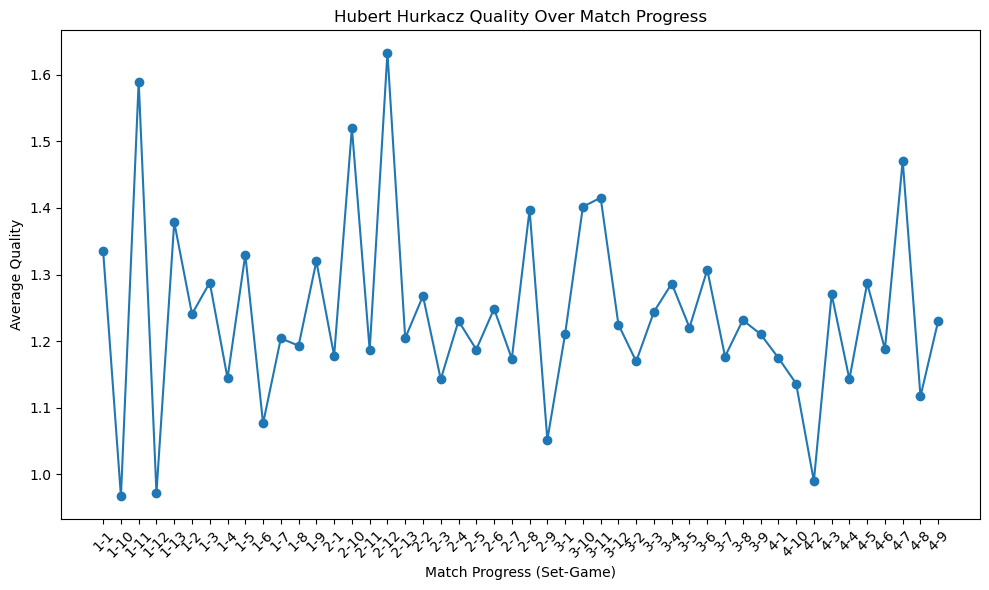

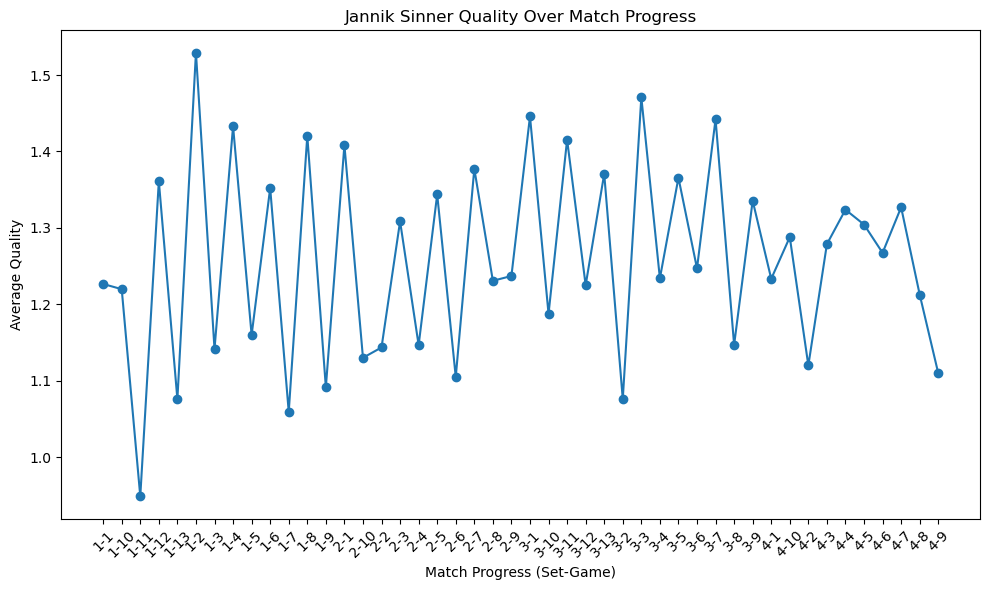

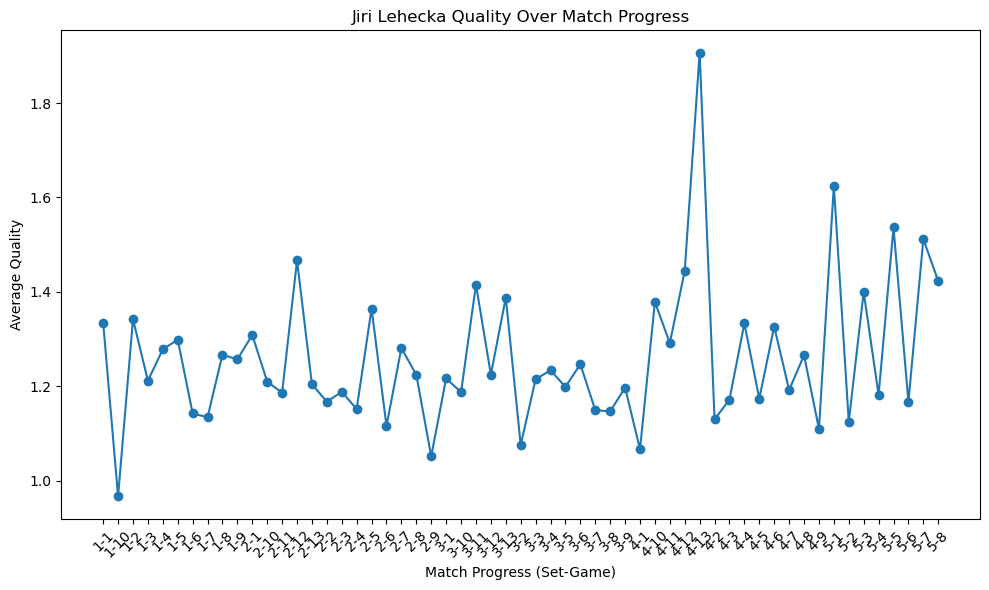

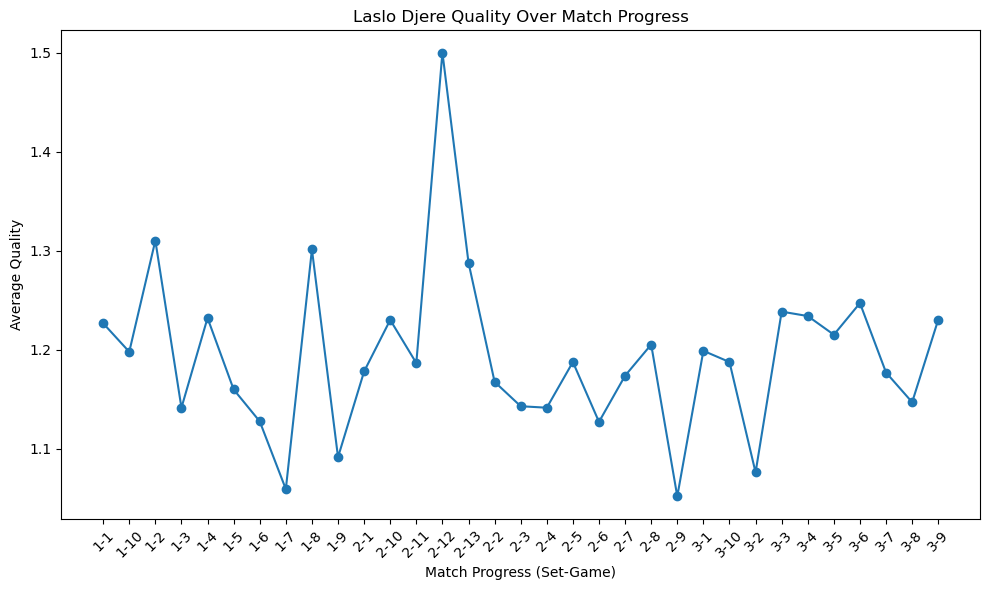

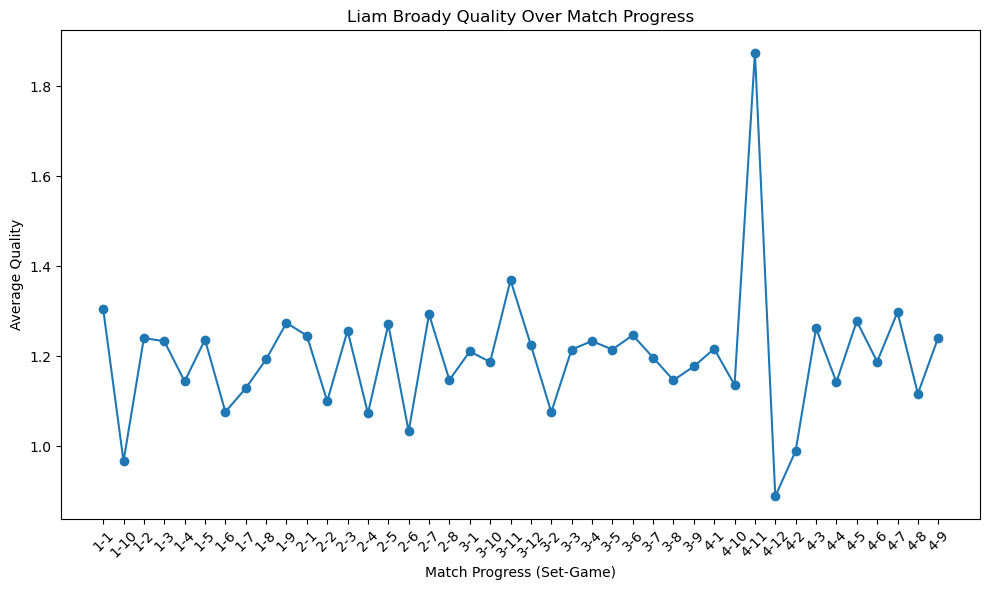

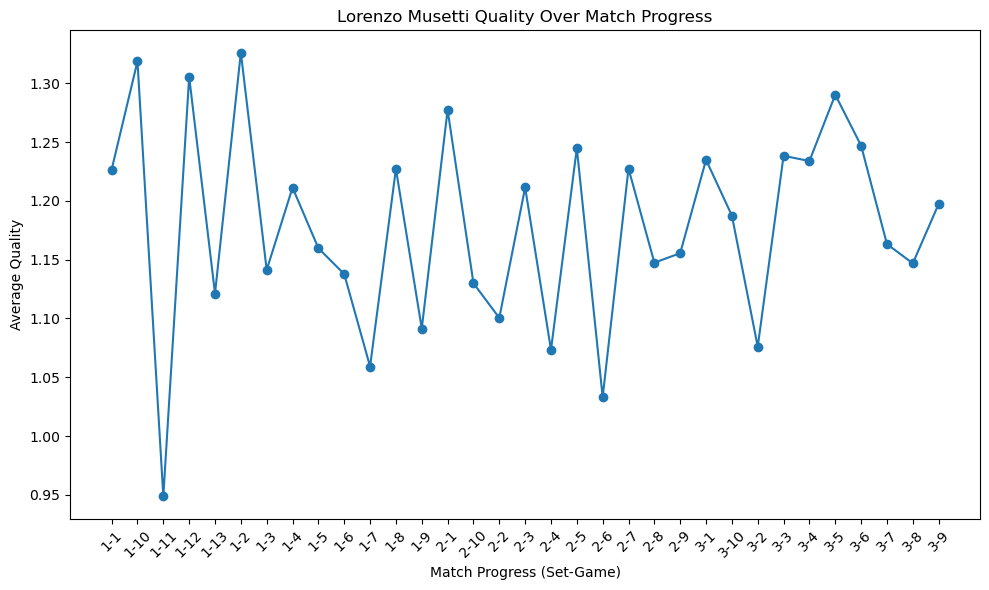

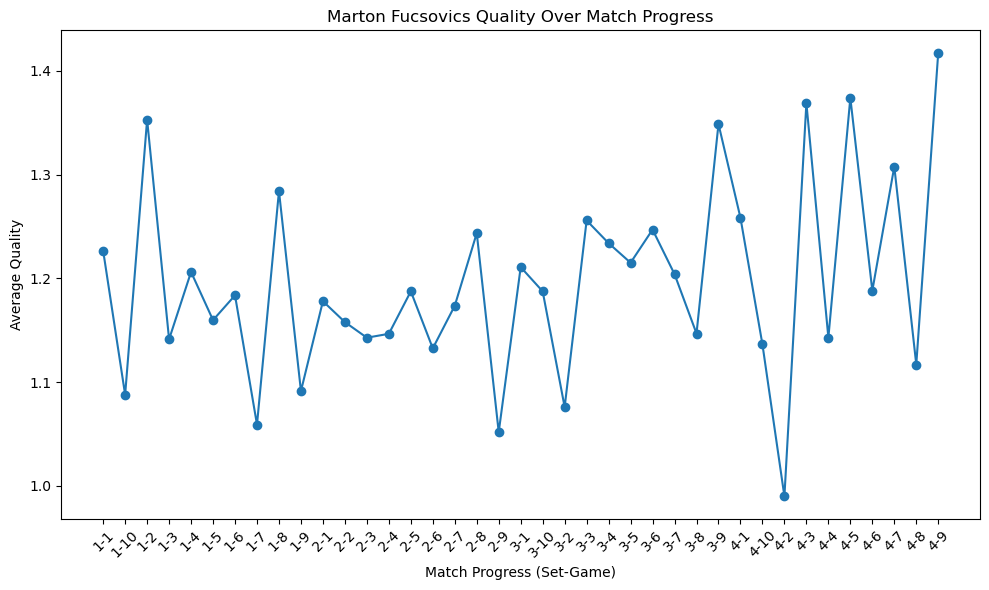

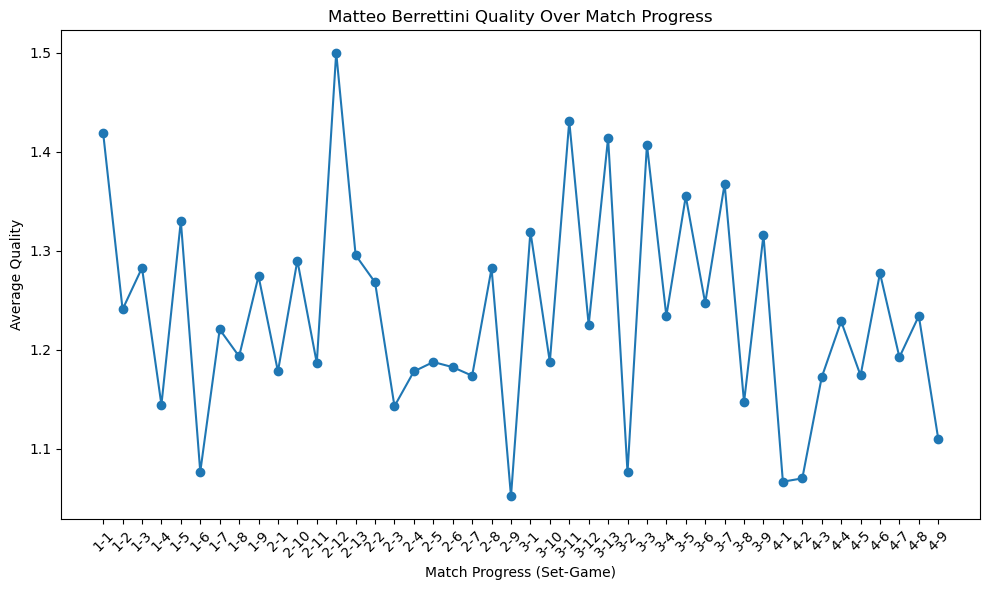

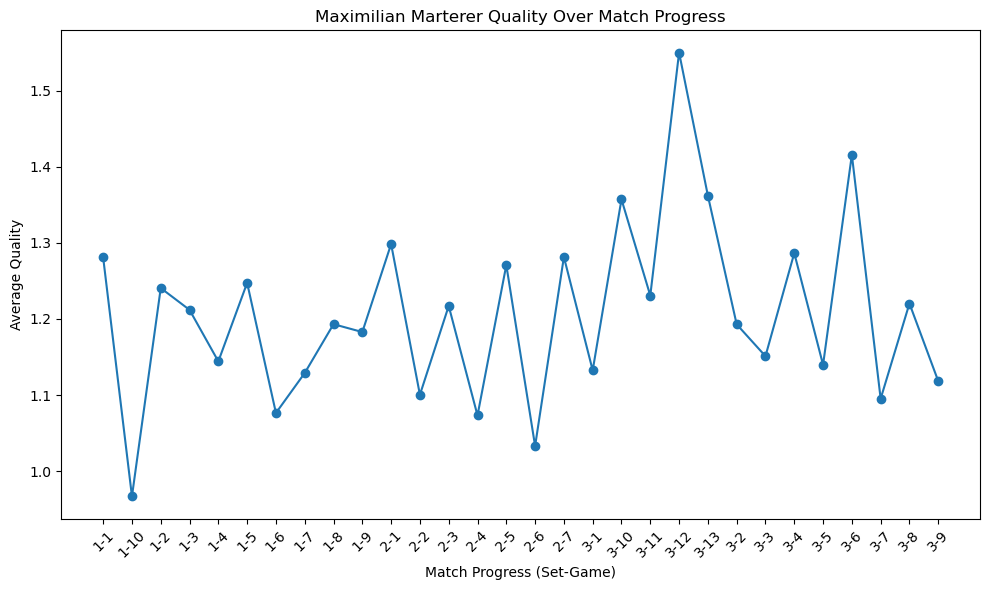

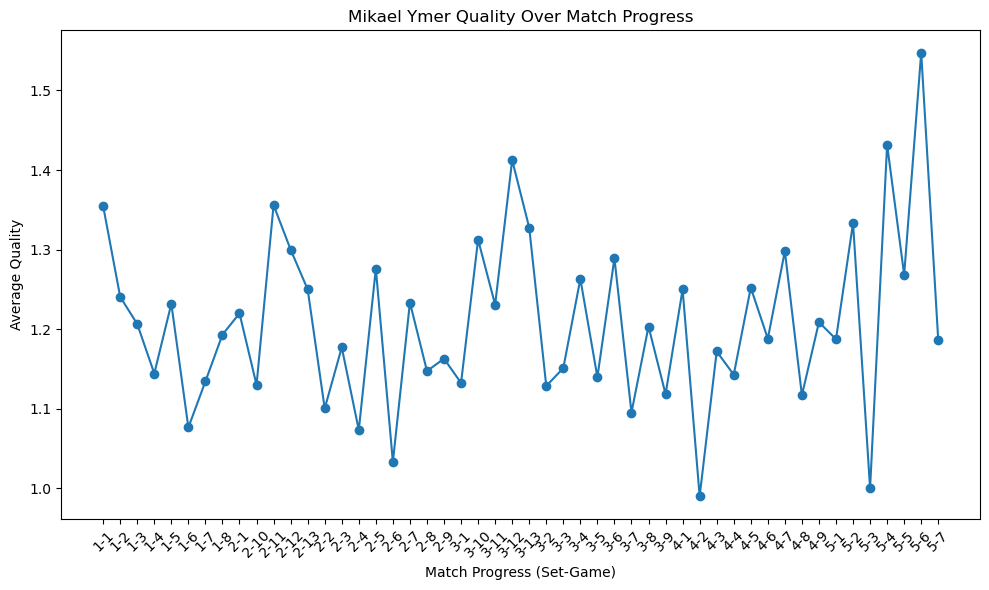

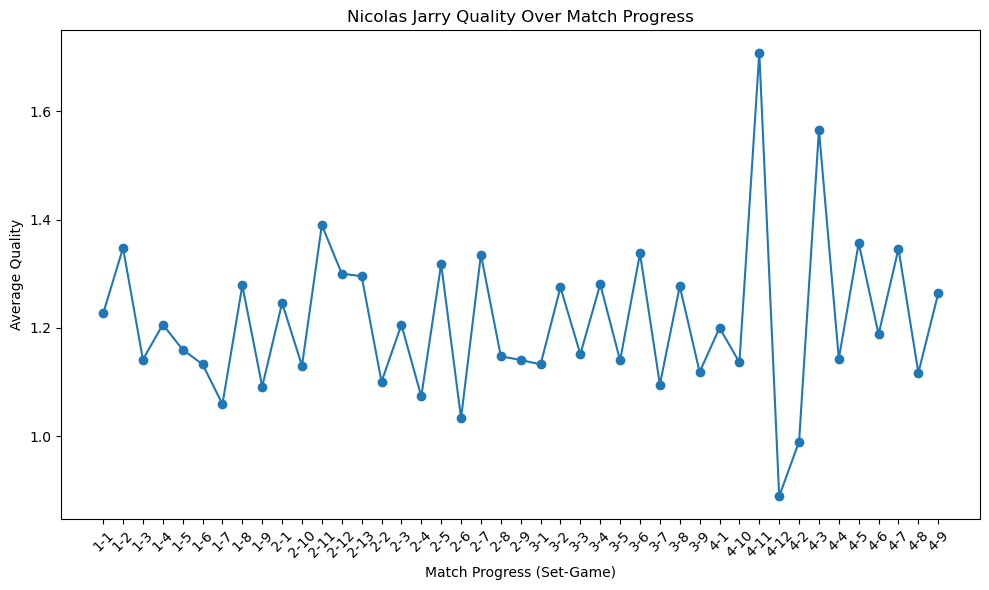

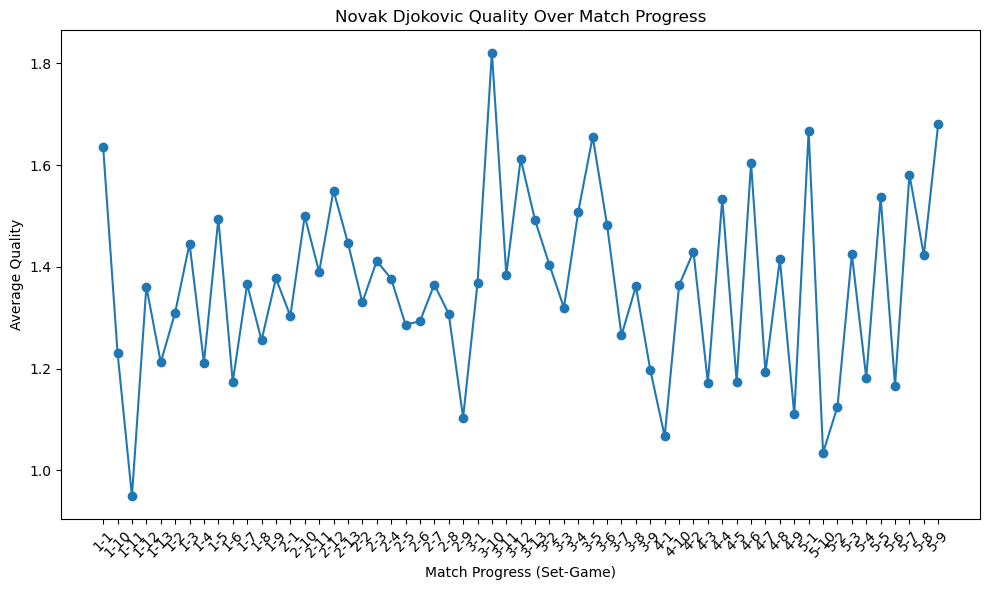

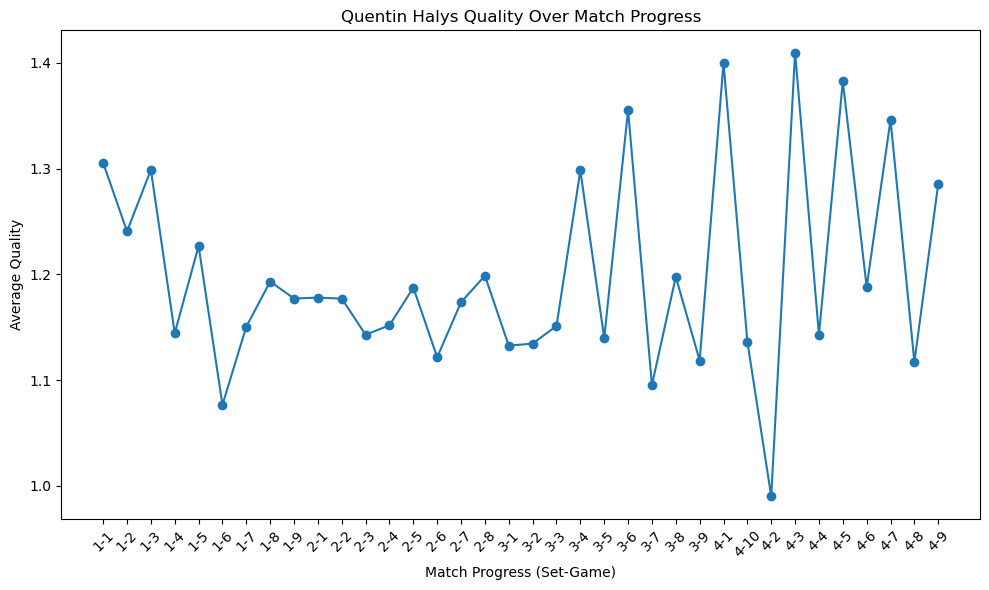

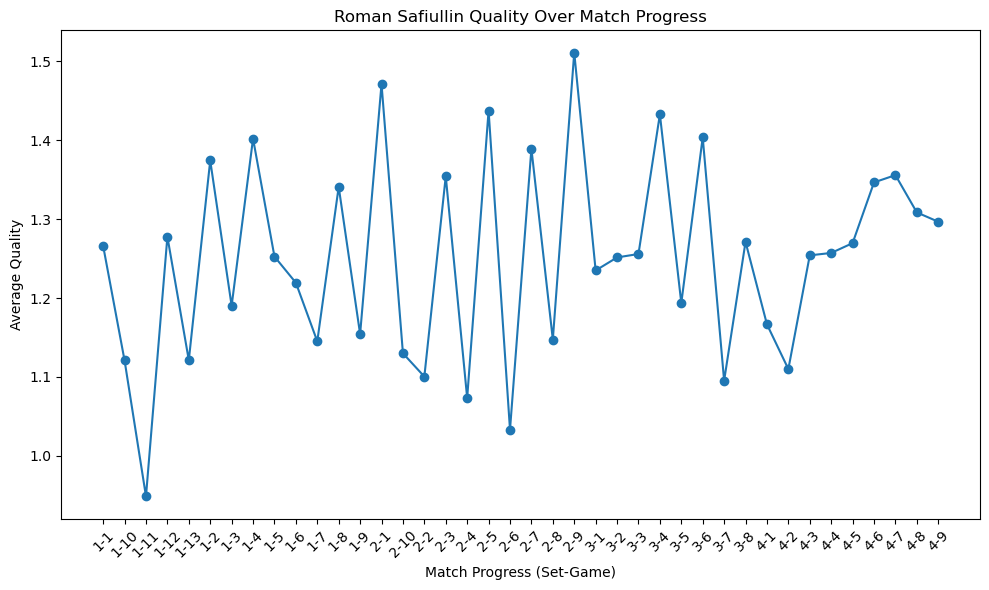

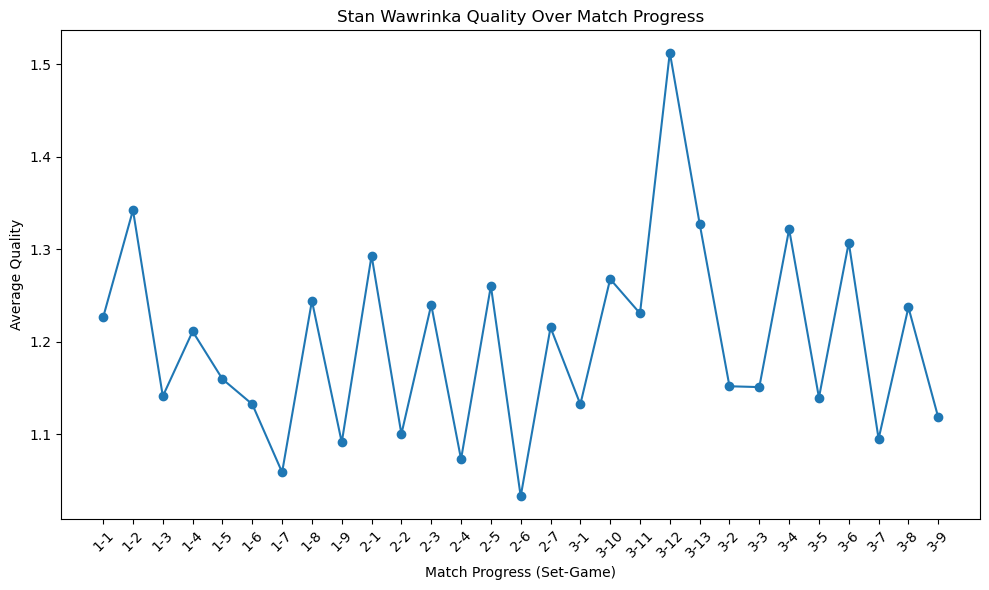

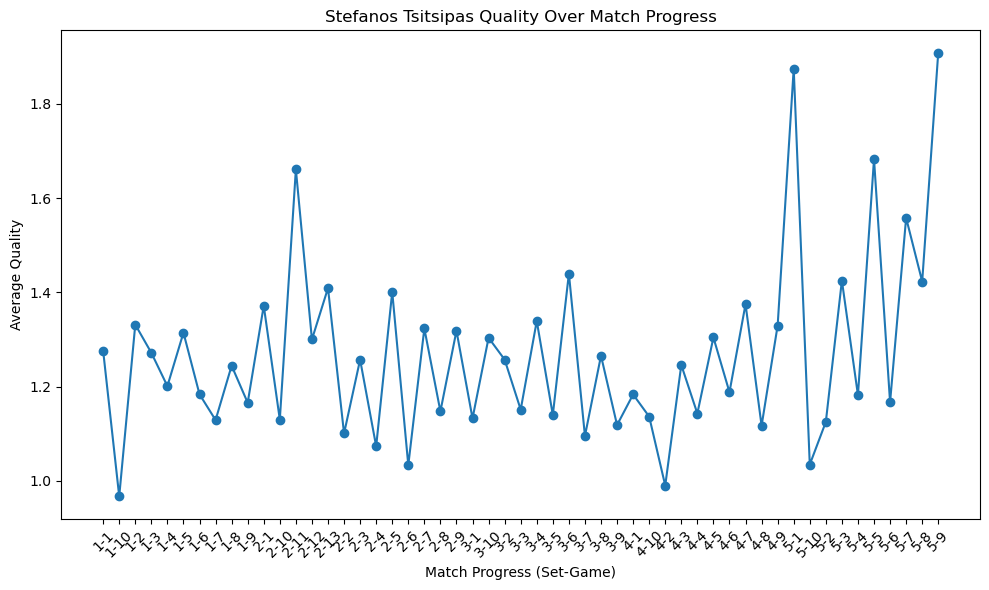

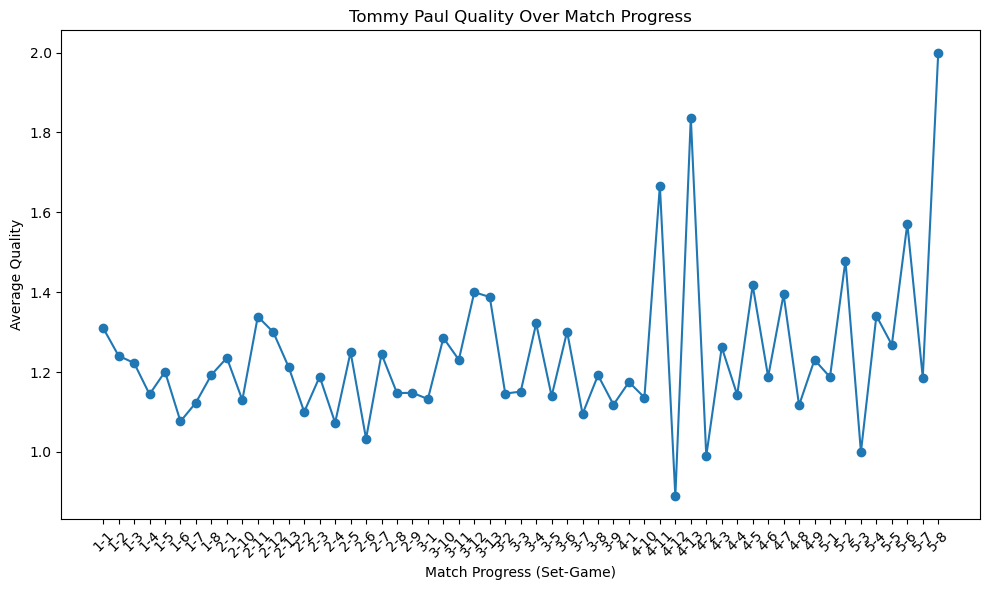

In [13]:
for player_name in all_players:
   
    data['match_progress'] = data['set_no'].astype(str) + '-' + data['game_no'].astype(str)
    
    data['quality'] = np.where(data['player1'] == player_name, data['player1_quality'], 
                               np.where(data['player2'] == player_name, data['player2_quality'], np.nan))
    
    player_data = data[(data['player1'] == player_name) | (data['player2'] == player_name)]
    
    avg_quality = player_data.groupby('match_progress')['quality'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(avg_quality['match_progress'], avg_quality['quality'], marker='o', linestyle='-', label=player_name)
    
    plt.title(f'{player_name} Quality Over Match Progress')
    plt.xlabel('Match Progress (Set-Game)')
    plt.ylabel('Average Quality')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
data.to_csv('data/quality_data.csv')

In [ ]:
filtered_data = data[data['game_victor'] != 0].copy()
filtered_data['predicted_victor'] = np.where(filtered_data['player1_quality'] > filtered_data['player2_quality'], 1, 2)
actual_victor = filtered_data['game_victor']
predicted_victor = filtered_data['predicted_victor']

filtered_data['correct_prediction'] = filtered_data['predicted_victor'] == filtered_data['game_victor']

correct_predictions = filtered_data['correct_prediction'].sum()
total_predictions = len(filtered_data)

accuracy = correct_predictions / total_predictions

print(f"预测正确率为: {accuracy:.2%}")

## ELO

In [10]:
BASELINE_ELO = 1500.00
data['elo1'] = BASELINE_ELO
data['elo2'] = BASELINE_ELO

K = 40

def update_elo(elo_winner, elo_loser, K=40):

    expected_win = 1 / (1 + 10 ** ((elo_loser - elo_winner) / 400))
    update_winner = elo_winner + K * (1 - expected_win)
    update_loser = elo_loser - K * (1 - expected_win)
    return update_winner, update_loser

for index, row in data.iterrows():
    if row['elapsed_time'] == '00:00:00':
        current_elo1 = BASELINE_ELO
        current_elo2 = BASELINE_ELO
    if row['game_victor'] in [1, 2]:
        if row['game_victor'] == 1:
            current_elo1, current_elo2 = update_elo(current_elo1, current_elo2, K)
        else:
            current_elo2, current_elo1 = update_elo(current_elo2, current_elo1, K)

    data.at[index, 'elo1'] = float(current_elo1)
    data.at[index, 'elo2'] = float(current_elo2)
data

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth,player1_quality,player2_quality,elo1,elo2
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,7.840,2,95.0,BC,NCTL,ND,1.433498,1.226601,1500.000000,1500.000000
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,7.094,1,118.0,B,CTL,ND,1.433498,1.226601,1500.000000,1500.000000
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,19.808,4,120.0,B,NCTL,D,1.433498,1.226601,1500.000000,1500.000000
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,75.631,13,130.0,BW,CTL,D,1.433498,1.226601,1500.000000,1500.000000
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0.813,1,112.0,W,NCTL,NaN,1.433498,1.226601,1500.000000,1500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:39:58,5,10,330,2,2,5,...,50.971,11,123.0,C,NCTL,D,1.517241,1.034483,1496.879645,1503.120355
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:40:43,5,10,331,2,2,5,...,27.766,5,114.0,W,NCTL,ND,1.517241,1.034483,1496.879645,1503.120355
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:20,5,10,332,2,2,5,...,18.328,4,124.0,W,NCTL,D,1.517241,1.034483,1496.879645,1503.120355
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:52,5,10,333,2,2,5,...,10.537,1,130.0,C,NCTL,D,1.517241,1.034483,1496.879645,1503.120355
